In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay

In [2]:
#importing the dataset
data_train=pd.read_csv('CE802_P2_Data.csv')
test_df=pd.read_csv('CE802_P2_Test.csv')

In [3]:
test_data = test_df.iloc[:,:-1].copy()

In [4]:
count = data_train.isna().sum()
count

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

# Data Pre-Processing

In [5]:
x_data_train = data_train.drop(columns = 'Class',axis =1)
y_data_train = data_train['Class']

In [6]:
#imputing the missing value using KNN
KNN_imputer = KNNImputer(n_neighbors = 15)
KNN_imputer = KNN_imputer.fit_transform(x_data_train)
x_data_train_imp = pd.DataFrame(KNN_imputer)

In [7]:
x_data_train_imp.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [8]:
# data normalisation
standara_scalar = StandardScaler()
x_norm_imp = standara_scalar.fit_transform(x_data_train_imp)
x_norm_imp = pd.DataFrame(x_norm_imp)

# Splitting dataset

In [9]:
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_norm_imp,y_data_train, test_size=0.3, random_state=20)

# Data Analysis & Visualization

True     360
False    340
Name: Class, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Class'>

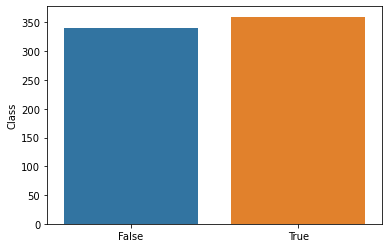

In [10]:
#data distribution and visualisation
num_value=y_data_train.value_counts()
print(num_value)
sns.barplot(num_value.index,num_value)

In [11]:
#correlation matrix
corr_matrix = x_data_train.corr()
print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.019454 -0.011891 -0.019783 -0.060550  0.017738  0.038266   
1   0.019454  1.000000  0.022463 -0.055937 -0.022811  0.020618 -0.031578   
2  -0.011891  0.022463  1.000000 -0.034649 -0.014070 -0.003918  0.030385   
3  -0.019783 -0.055937 -0.034649  1.000000 -0.217549  0.004802 -0.034937   
4  -0.060550 -0.022811 -0.014070 -0.217549  1.000000 -0.091502 -0.034316   
5   0.017738  0.020618 -0.003918  0.004802 -0.091502  1.000000  0.062851   
6   0.038266 -0.031578  0.030385 -0.034937 -0.034316  0.062851  1.000000   
7  -0.003874  0.016441  0.250280  0.001602 -0.026044 -0.028374  0.005917   
8  -0.011766  0.039536  0.028919  0.051259  0.152219  0.010219 -0.287077   
9  -0.030631 -0.043589 -0.015385 -0.067983  0.001927 -0.040474 -0.009051   
10 -0.020264 -0.010894 -0.005232  0.102450 -0.005368 -0.007924 -0.027435   
11 -0.052103  0.015920  0.018797 -0.065455  0.008647  0.071668 -0.016256   
12  0.009167

<AxesSubplot:title={'center':'Corealation Matrix'}>

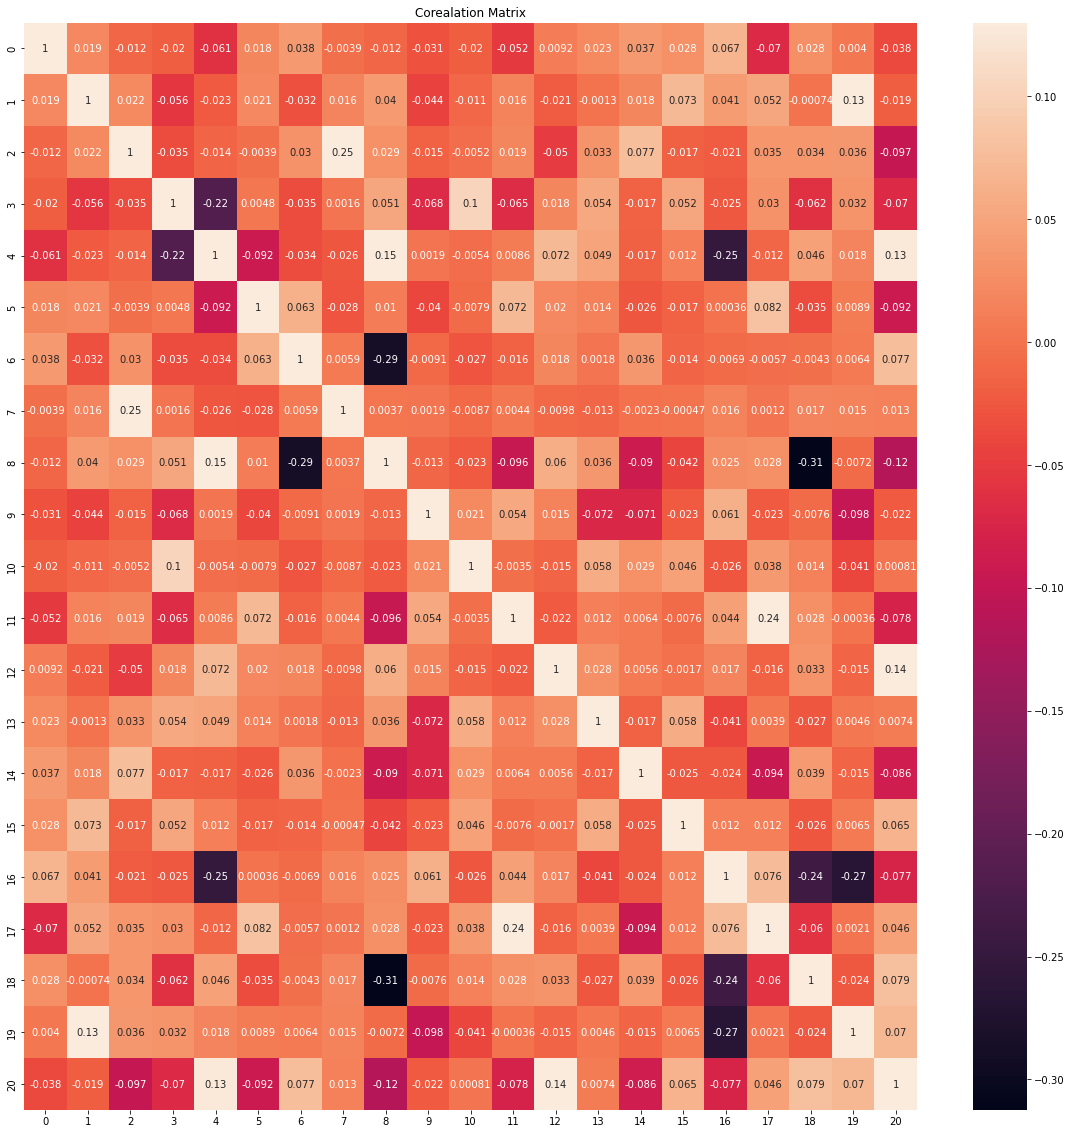

In [12]:
#heat map for corelation matrix
plt.subplots(figsize = (20,20))
plt.title('Corealation Matrix')
sns.heatmap(corr_matrix,vmax = 0.13,annot=True)

In [13]:
#from the above heatmap we can see that the values are lying between -0.7 and 0.7. Thus we can say they are not highly correlated

# Feature Selection

<AxesSubplot:>

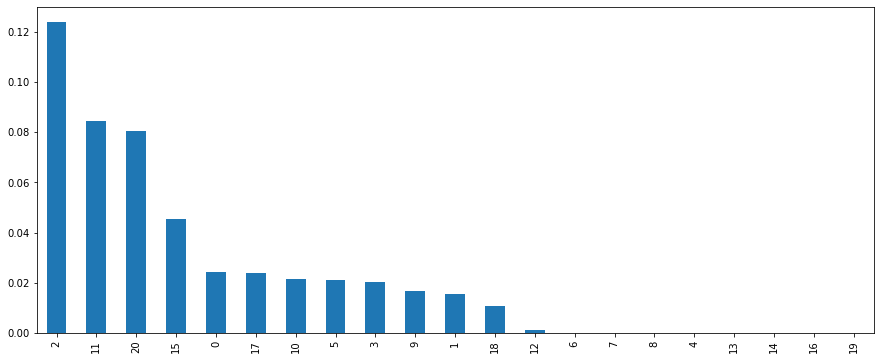

In [14]:
#checking the most important features
info = mutual_info_classif(x_data_train,y_data_train)
info
info = pd.Series(info)
info.index = x_data_train.columns
info.sort_values(ascending = False).plot.bar(figsize = (15,6))

In [15]:
#selecting the best features
feature_selection = SelectKBest(mutual_info_classif , k = 10)
feature_selection.fit(x_data_train,y_data_train)
feature_selection_train = x_data_train[x_data_train.columns[feature_selection.get_support()]]
feature_selection_test = x_data_test[x_data_test.columns[feature_selection.get_support()]]
Compare_score = {}

# Decision Tree

In [16]:
decision_tree = DecisionTreeClassifier(random_state = 20)
decision_tree.fit(feature_selection_train,y_data_train)
predict_tree = decision_tree.predict(feature_selection_test)

# Performance Evaluation

In [17]:
accuracy = accuracy_score(y_data_test,predict_tree)
Compare_score['Decision Tree'] = accuracy

              precision    recall  f1-score   support

       False       0.78      0.72      0.75       154
        True       0.73      0.78      0.75       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

Confusion Matrix [[111  43]
 [ 32 114]]


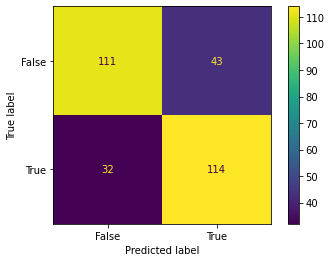

In [18]:
#confusion matrix
c_report = classification_report(y_data_test,predict_tree)
c_matrix = confusion_matrix(y_data_test, predict_tree)
print(c_report)
print('Confusion Matrix', c_matrix)
plot_matrix = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
plot_matrix.plot()
plt.show()

In [19]:
# Finding accuracy scores with various depths
accuracy_train = [] 
accuracy_test =  []
for i in range(1,15):
    decision_model = DecisionTreeClassifier(max_depth = i,random_state = 10, min_samples_split = 2, min_samples_leaf = 1, max_leaf_nodes=None)
    decision_model.fit(feature_selection_train,y_data_train)
    accuracy_train.append(decision_model.score(feature_selection_train,y_data_train))
    accuracy_test.append(decision_model.score(feature_selection_test,y_data_test))
hypertuned_model = pd.DataFrame({'Max Depth':range(1,15), 'Training Accuracy': accuracy_train, 'Test Accuracy ': accuracy_test})
hypertuned_model

,Max Depth,Training Accuracy,Test Accuracy
0,1,0.747143,0.653333
1,2,0.747143,0.653333
2,3,0.830000,0.810000
3,4,0.858571,0.813333
4,5,0.892857,0.796667
5,6,0.908571,0.803333
6,7,0.932857,0.786667
7,8,0.947143,0.743333
8,9,0.962857,0.740000
9,10,0.977143,0.753333


In [20]:
#grid search
Decision_op = DecisionTreeClassifier(class_weight = 'balanced',random_state = 20)
grid_param ={ 'max_depth':np.arange(14)+1,'criterion':['gini','entropy']}
data_grid = GridSearchCV(estimator = Decision_op, param_grid = grid_param, cv = 8,verbose =1)
data_grid.fit(feature_selection_train,y_data_train)
data_grid.best_estimator_

Fitting 8 folds for each of 28 candidates, totalling 224 fits


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=20)

In [21]:
# Predictions after hyperparameter tuning
new_test_prediction  = data_grid.best_estimator_.predict(feature_selection_test)
accuracy = accuracy_score(y_data_test,new_test_prediction)
Compare_score['Decision Tree after Hyper Parameter Tuned'] = accuracy

# Performance Evaluation  (Hyperparameter Tuned)

              precision    recall  f1-score   support

       False       0.89      0.71      0.79       154
        True       0.75      0.91      0.82       146

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

Confusion Matrix  [[110  44]
 [ 13 133]]


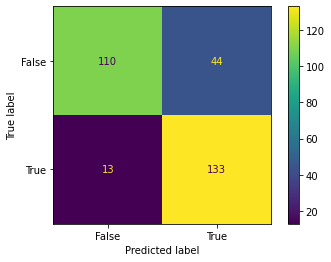

In [22]:
#Confusion matrix - Testing
c_report = classification_report(y_data_test,new_test_prediction)
c_mat = confusion_matrix(y_data_test,new_test_prediction)
print(c_report)
print('Confusion Matrix ', c_mat)
plot_matrix = ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = [False, True])
plot_matrix.plot()
plt.show()

# Random Forest Model

In [23]:
#Random forest model
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 20)
random_forest.fit(feature_selection_train,y_data_train)
predict_forest = random_forest.predict(feature_selection_test)

# Performance Evaluation

              precision    recall  f1-score   support

       False       0.84      0.76      0.80       154
        True       0.77      0.85      0.81       146

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

Confusion Matrix [[117  37]
 [ 22 124]]


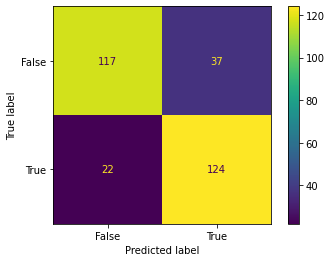

In [24]:
#Classification report & Confusion matrix 
accuracy = accuracy_score(y_data_test,predict_forest)
Compare_score['Random Forest Model'] = accuracy
c_report = classification_report(y_data_test,predict_forest)
c_mat = confusion_matrix(y_data_test, predict_forest)
print(c_report)
print('Confusion Matrix', c_mat)
plot_matrix = ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = [False, True])
plot_matrix.plot()
plt.show()

# Hyper Paramater Tuning

In [25]:
#Setting the parameters
grid_params = {
    'max_features':['sqrt', 'log2'],
    'n_estimators' : [10, 100, 1000],
    'criterion': ['gini','entropy']
}
random_op = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)
grid_search_random =  GridSearchCV(estimator = random_forest, param_grid = grid_params, cv = random_op,scoring='accuracy',error_score=0)
grid_search_random.fit(feature_selection_train,y_data_train)
grid_search_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1000,
                       random_state=20)

In [26]:
#after hyperparameter tuning
new_test_prediction  = grid_search_random.best_estimator_.predict(feature_selection_test)
accuracy = accuracy_score(y_data_test,new_test_prediction)
Compare_score['Random Forest Model after Hyper Parameter Tuning'] = accuracy

# Performance Evaluation(Post Hyperparameter Tuning)

              precision    recall  f1-score   support

       False       0.86      0.77      0.81       154
        True       0.78      0.86      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

Confusion Matrix  [[119  35]
 [ 20 126]]


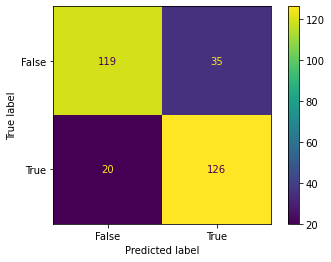

In [27]:
#Confusion matrix - Testing
c_report = classification_report(y_data_test,new_test_prediction)
c_mat = confusion_matrix(y_data_test,new_test_prediction)
print(c_report)
print('Confusion Matrix ', c_mat)
plot_matrix = ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = [False, True])
plot_matrix.plot()
plt.show()

# KNN-Model

In [28]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(feature_selection_train,y_data_train)
predict_knn = knn_model.predict(feature_selection_test)

# Performance Evaluation

              precision    recall  f1-score   support

       False       0.70      0.69      0.69       154
        True       0.68      0.68      0.68       146

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

Confusion Matrix [[106  48]
 [ 46 100]]


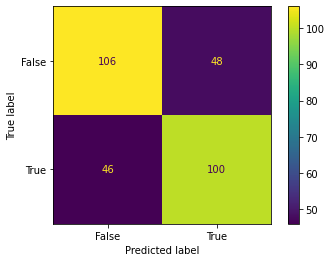

In [29]:
#Confusion matrix
accuracy = accuracy_score(y_data_test,predict_knn)
Compare_score['KNN'] = accuracy
c_report = classification_report(y_data_test,predict_knn)
c_mat = confusion_matrix(y_data_test,predict_knn)
print(c_report)
print('Confusion Matrix', c_mat)
plot_matrix = ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = [False, True])
plot_matrix.plot()
plt.show()

# Hyper Paramater Tuning

In [30]:
#Setting the parameters
grid_params = {
    'n_neighbors' : range(1, 21, 2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
knn_op = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=grid_params, n_jobs=-1, cv=knn_op, scoring='accuracy',error_score=0)
grid_search_knn.fit(feature_selection_train,y_data_train)
grid_search_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [31]:
#after hyperparameter tuning
new_test_prediction  = grid_search_knn.best_estimator_.predict(feature_selection_test)
accuracy = accuracy_score(y_data_test,new_test_prediction)
Compare_score['KNN after Hyper Paramet Tuning'] = accuracy

              precision    recall  f1-score   support

       False       0.73      0.75      0.74       154
        True       0.73      0.71      0.72       146

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

Confusion Matrix  [[115  39]
 [ 42 104]]


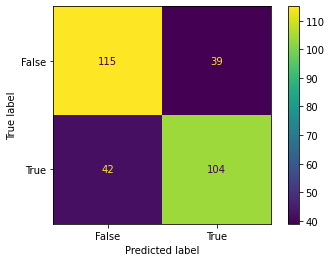

In [32]:
#Confusion matrix - Testing 
c_report = classification_report(y_data_test,new_test_prediction)
c_mat = confusion_matrix(y_data_test,new_test_prediction)
print(c_report)
print('Confusion Matrix ', c_mat)
plot_matrix = ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = [False, True])
plot_matrix.plot()
plt.show()

In [33]:
print(Compare_score)

{'Decision Tree': 0.75, 'Decision Tree after Hyper Parameter Tuned': 0.81, 'Random Forest Model': 0.8033333333333333, 'Random Forest Model after Hyper Parameter Tuning': 0.8166666666666667, 'KNN': 0.6866666666666666, 'KNN after Hyper Paramet Tuning': 0.73}


# Testing data

In [34]:
count = test_data.isna().sum()
count

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

In [35]:
#imputing the missing value using KNN
KNN_imputer = KNNImputer(n_neighbors = 15)
KNN_imputer = KNN_imputer.fit_transform(test_data)
x_data_test_imp = pd.DataFrame(KNN_imputer)

In [36]:
# data normalisation
standara_scalar = StandardScaler()
x_norm_imp = standara_scalar.fit_transform(x_data_test_imp)
x_norm_imp = pd.DataFrame(x_norm_imp)

In [37]:
feature_selection_test = x_norm_imp[x_norm_imp.columns[feature_selection.get_support()]]

In [46]:
new_test_prediction  = grid_search_random.best_estimator_.predict(feature_selection_test)

In [47]:
new_test_prediction

array([ True,  True, False, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False,  True,

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   int64  
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
dtypes: float64(19), int64(2)
memory usage:

In [49]:
test_df.iloc[:,-1]=new_test_prediction

In [50]:
test_df.iloc[:,-1]

0       True
1       True
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999     True
Name: Class, Length: 1000, dtype: bool

In [51]:
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,0,180.3900,-2683.26,4.06290,-1803.74,15.6120,-2.91120,-4.69490,5917.88,35245.830,...,-2.4056,1,0.575200,-19.6800,-1847.580,-5.50470,-5269.35,-17.46600,NaN,True
1,1,194.2400,-4072.86,4.33670,-3023.74,10.2369,-5.88200,-6.92700,5736.56,35230.200,...,-3.0515,1,0.972600,43.0200,-1468.340,-5.80050,-4922.25,-14.28030,NaN,True
2,1,169.7700,-4311.36,4.12910,-2007.24,10.3749,-2.50970,-6.06100,4726.04,35438.730,...,-2.6240,1,0.133616,2.6610,-1900.940,-4.73355,-3219.45,-17.25000,-48.54,False
3,0,183.2540,-4332.98,3.84855,904.26,15.9840,-2.10121,-5.61200,-2835.76,35262.396,...,-2.4225,1,1.078600,6.5400,-1894.500,-14.31600,-975.75,-17.19300,NaN,False
4,1,174.3080,-4279.17,6.45200,-2712.87,11.0646,-2.27950,-4.47745,6893.64,35244.660,...,-3.3620,1,1.521000,-13.1040,-1774.988,-5.68800,-4805.25,-15.23730,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,175.3020,-4367.16,7.03200,-2671.39,9.8322,-2.28140,-5.25890,6096.84,34856.730,...,-2.8364,1,0.132896,37.1580,-1834.960,-5.27520,-4757.55,-17.67300,-51.03,False
996,1,186.1800,-4299.01,4.89000,-2834.18,10.0860,-2.20870,-7.03200,1814.24,35385.180,...,-2.3489,1,2.279000,-4.0230,-1850.440,-9.58200,3002.25,-14.80080,-45.60,False
997,1,173.5080,-4195.02,4.89800,-2813.35,9.7593,-3.11400,-6.19700,5460.44,35328.450,...,-2.8860,1,0.231300,-3.0510,-1663.240,-4.72704,-4675.62,-14.69790,-52.62,True
998,1,172.4820,-4295.76,3.99680,-3721.34,11.0550,-3.71300,-5.23050,5125.04,35059.590,...,-2.6042,1,0.791000,12.9513,-1863.920,-5.70330,-2144.55,-13.87860,NaN,False


In [52]:
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [53]:
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])